# Modify and explore dataset into a single dataset and attempt to add difference of years column
##

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib
import plotly.figure_factory as ff
from IPython.core.display import display
from scipy import stats

# pd.set_option('display.max_columns', None)
# pd.reset_option('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

In [2]:
# define useful function to create scatterplots of target feature against desired columns
def scatterplots(df, target, columns, ncol=None, figsize=(20, 25)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.7, hspace=0.7)
    for i, col in enumerate(columns):
        # ax = axes.flatten()[i]
        # ax.scatter(x = col, y = target, data=df, alpha=0.5)
        sns.regplot(ax=axes.flatten()[i], x=col, y=target, data=df, scatter_kws={'alpha':0.5})
        # ax.set(xlabel=col, ylabel=target)
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

### Load data

In [3]:
# all us counties for pm10 aqi
pm10_df_17 = r'../../data/processed/all_pm10_df_2017'
pm10_df_18 = r'../../data/processed/all_pm10_df_2018'
pm10_df_19 = r'../../data/processed/all_pm10_df_2019'
df_2017 = pd.read_csv(pm10_df_17)
df_2018 = pd.read_csv(pm10_df_18)
df_2019 = pd.read_csv(pm10_df_19)

In [4]:
# merge years 2017-2019 as one df
df_17_18 = pd.merge(df_2017, df_2018)
df = pd.merge(df_17_18, df_2019)
df

GeoFIPS State Name County Name   AQI_2017  Civilian_labor_force_2017  \
0       1073    Alabama   Jefferson  16.502154                     311481   
1       1089    Alabama     Madison  11.672996                     176562   
2       1101    Alabama  Montgomery  13.368852                     106155   
3       4001    Arizona      Apache  15.027397                      20361   
4       4003    Arizona     Cochise  21.075314                      49327   
..       ...        ...         ...        ...                        ...   
203    55027  Wisconsin       Dodge   9.319249                      48430   
204    55079  Wisconsin   Milwaukee  12.681905                     475142   
205    55133  Wisconsin    Waukesha  12.710843                     226155   
206    56021    Wyoming     Laramie  10.420240                      48230   
207    56025    Wyoming     Natrona  10.943983                      39535   

     Employed_2017  Unemployed_2017  Unemployment_rate_2017  \
0           298227            13254                     4.3   
1           169711             6851                     3.9   
2           101555             4600                     4.3   
3            18274             2087                    10.2   
4            46592             2735                     5.5   
..             ...              ...                     ...   
203          47025             1405                     2.9   
204         456025            19117                     4.0   
205         219636             6519                     2.9   
206          46472             1758                     3.6   
207          37472             2063                     5.2   

     Poverty Estimate, All Ages_2017  90% CI LB All Ages_2017  ...  \
0                           107752.0                  99555.0  ...   
1                            44979.0                  39979.0  ...   
2                            46315.0                  41097.0  ...   
3                            23426.0                  21195.0  ...   
4                            19219.0                  15585.0  ...   
..                               ...                      ...  ...   
203                           7001.0                   5904.0  ...   
204                         177959.0                 169042.0  ...   
205                          19090.0                  16633.0  ...   
206                           9294.0                   7767.0  ...   
207                           8631.0                   7133.0  ...   

     HWAC_MALE_ratio_2019  HWAC_FEMALE_ratio_2019  HBAC_MALE_ratio_2019  \
0                1.931601                1.694117              0.178872   
1                2.353121                2.174257              0.265480   
2                1.559037                1.402736              0.283461   
3                2.469153                2.046267              0.062598   
4               16.791347               16.901733              0.461397   
..                    ...                     ...                   ...   
203              2.651442                2.127756              0.095630   
204              7.161165                6.882860              0.653572   
205              2.343406                2.297884              0.083870   
206              7.128643                6.737688              0.269347   
207              4.169902                3.735380              0.184077   

     HBAC_FEMALE_ratio_2019  HIAC_MALE_ratio_2019  HIAC_FEMALE_ratio_2019  \
0                  0.190260              0.060586                0.053297   
1                  0.296319              0.103779                0.100561   
2                  0.305096              0.101993                0.104642   
3                  0.054252              1.053042                1.053042   
4                  0.433602              0.717905                0.680580   
..                      ...                   ...                     ...   
203                0.077414              0

In [5]:
# drop AQI features for 2017, 2018 and retain AQI for 2019
df.drop(['AQI_2017', 'AQI_2018'], axis=1, inplace=True)
# to verify whether 2017 and 2018 aqi columns are still present
('AQI_2017' and 'AQI_2018') in df.columns


False

In [6]:
# From 2017, 2018, 2019 columns use to predict 2019 aqi
# right here using corr() to find r values of dataset on AQI feature
# make a list a that contains r values features greater than 0.4 and less than -0.3
# Use that list to retain a dataframe with those attributes to explore; rather than exploring all unnecessary columns
corr_2019 = list(zip(df.corr()['AQI_2019'].sort_values(ascending=False).index.tolist(), df.corr()['AQI_2019'].sort_values(ascending=False).values.tolist()))
r_feat_2019 = [feature[0] for feature in corr_2019 if feature[1] >= 0.4 or feature[1] <= -0.3]
top_r_features_2019 = df[r_feat_2019]
top_r_features_2019

AQI_2019  HWA_MALE_ratio_2017  HWA_MALE_ratio_2019  HWA_MALE_ratio_2018  \
0    20.073389             1.809433             1.899106             1.851754   
1    12.958515             2.163301             2.275354             2.226134   
2    13.125000             1.430929             1.485302             1.445449   
3    11.247911             2.253127             2.337001             2.259832   
4    17.413408            16.347386            16.440336            16.309498   
..         ...                  ...                  ...                  ...   
203  10.503937             2.501568             2.596796             2.578757   
204  14.431990             6.657637             6.944189             6.833803   
205  15.656425             2.201053             2.271659             2.229195   
206  13.354142             6.848145             6.837186             6.788044   
207   9.385135             3.736838             3.925718             3.835807   

     HWAC_MALE_ratio_2017  HWAC_MALE_ratio_2019  HWAC_MALE_ratio_2018  \
0                1.840361              1.931601              1.881780   
1                2.238765              2.353121              2.302427   
2                1.503971              1.559037              1.520503   
3                2.369138              2.469153              2.368571   
4               16.694163             16.791347             16.642539   
..                    ...                   ...                   ...   
203              2.548315              2.651442              2.628852   
204              6.869809              7.161165              7.050284   
205              2.266406              2.343406              2.295775   
206              7.126666              7.128643              7.079351   
207              3.941648              4.169902              4.061888   

     H_MALE_ratio_2017  H_MALE_ratio_2018  H_MALE_ratio_2019  ...  \
0             2.062920           2.110007           2.163314  ...   
1             2.559141           2.615230           2.670625  ...   
2             1.857743           1.872815           1.917999  ...   
3             3.309805           3.372322           3.490200  ...   
4            17.753716          17.693872          17.860263  ...   
..                 ...                ...                ...  ...   
203           2.698820           2.781415           2.806271  ...   
204           7.621041           7.815673           7.935491  ...   
205           2.384142           2.421731           2.477251  ...   
206           7.665410           7.627573           7.665327  ...   
207           4.386450           4.510262           4.616945  ...   

     NHWA_FEMALE_ratio_2019  NHWAC_FEMALE_ratio_2017  NHWAC_FEMALE_ratio_2019  \
0                 25.627835                26.375116                26.184645   
1                 32.425069                33.722447                33.563953   
2                 16.793974                17.894528                17.323367   
3                  8.861129                 9.451394                 9.399474   
4                 26.852337                27.971233                27.961754   
..                      ...                      ...                      ...   
203               43.589977                44.167379                44.024864   
204               25.900631                27.338629                26.980648   
205               44.800568                45.736208                45.469052   
206               39.065327                40.184189                40.155779   
207               42.922437                44.182394                43.877883   

     NHWAC_FEMALE_ratio_2018  NH_MALE_ratio_2019  NH_MALE_ratio_2018  \
0                  26.299723           45.095229           45.151487   
1                  33.633693           46.232995           46.233556   
2                  17.588652           45.057973           45.248208   
3                   9.479862           45.867820           45.8170

In [7]:
display(top_r_features_2019.corr()['AQI_2019'])
top_r_features_2019.shape

AQI_2019                   1.000000
HWA_MALE_ratio_2017        0.530037
HWA_MALE_ratio_2019        0.529591
HWA_MALE_ratio_2018        0.529498
HWAC_MALE_ratio_2017       0.528633
HWAC_MALE_ratio_2019       0.527989
HWAC_MALE_ratio_2018       0.527966
H_MALE_ratio_2017          0.517582
H_MALE_ratio_2018          0.516624
H_MALE_ratio_2019          0.516536
HWA_FEMALE_ratio_2017      0.510349
HWA_FEMALE_ratio_2018      0.509805
HWA_FEMALE_ratio_2019      0.509798
HWAC_FEMALE_ratio_2017     0.509259
HWAC_FEMALE_ratio_2018     0.508556
HWAC_FEMALE_ratio_2019     0.508462
H_FEMALE_ratio_2017        0.497564
H_FEMALE_ratio_2018        0.496516
H_FEMALE_ratio_2019        0.496121
LESS_HS_TOT_ratio_2017     0.456047
LESS_HS_TOT_ratio_2019     0.452503
LESS_HS_TOT_ratio_2018     0.447087
Unemployment_rate_2019     0.415146
Unemployment_rate_2018     0.407909
Unemployment_rate_2017     0.403307
HIA_FEMALE_ratio_2017      0.402930
HIA_MALE_ratio_2019        0.402144
HIA_MALE_ratio_2017        0

(208, 49)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

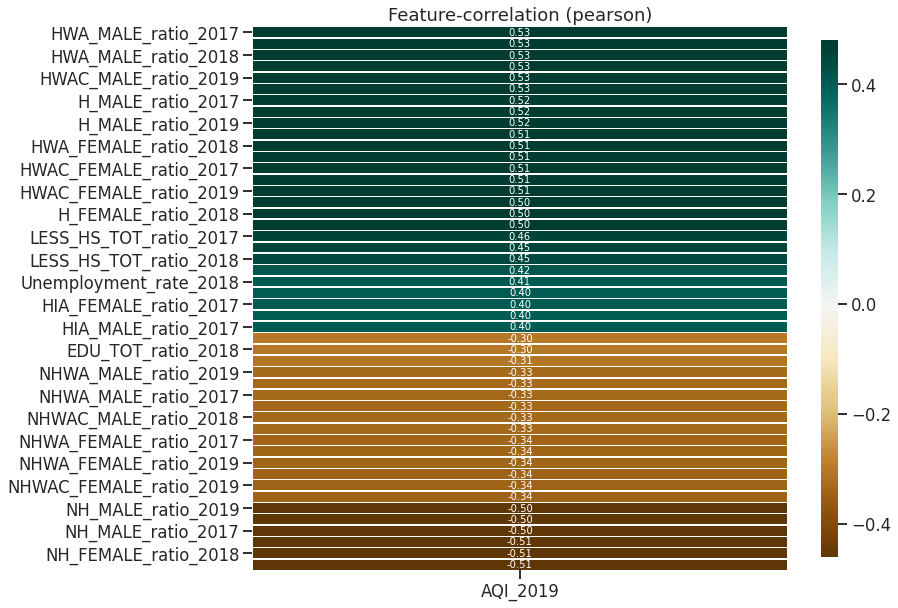

In [8]:
klib.corr_plot(top_r_features_2019, target='AQI_2019', method='pearson')

In [9]:
top_r_features_2019.corr()['AQI_2019'].head(10)

AQI_2019                1.000000
HWA_MALE_ratio_2017     0.530037
HWA_MALE_ratio_2019     0.529591
HWA_MALE_ratio_2018     0.529498
HWAC_MALE_ratio_2017    0.528633
HWAC_MALE_ratio_2019    0.527989
HWAC_MALE_ratio_2018    0.527966
H_MALE_ratio_2017       0.517582
H_MALE_ratio_2018       0.516624
H_MALE_ratio_2019       0.516536
Name: AQI_2019, dtype: float64

#perform difference of year columns and analyze relationship with 2019 aqi

In [10]:
# make variables storing lists of column names for respective years
df_17_columns = df.iloc[:, 3:190].columns.to_list()
df_18_columns = df.iloc[:, 190:377].columns.to_list()
df_19_columns = df.iloc[:, 378:565].columns.to_list()

In [11]:
df_18_17_diff = pd.DataFrame()
for col17, col18 in zip(df_17_columns, df_18_columns):
    df_18_17_diff[col17 + '_2018_diff'] = (df_2018[col18] - df_2017[col17])

df_18_17_diff


Civilian_labor_force_2017_2018_diff  Employed_2017_2018_diff  \
0                                   4312                     6021   
1                                   5003                     5641   
2                                   -202                      227   
3                                    130                      211   
4                                    155                      159   
..                                   ...                      ...   
203                                 -466                     -322   
204                                -6690                    -4550   
205                                 -481                       71   
206                                  -40                      -75   
207                                 -276                       37   

     Unemployed_2017_2018_diff  Unemployment_rate_2017_2018_diff  \
0                        -1709                              -0.6   
1                         -638                              -0.5   
2                         -429                              -0.4   
3                          -81                              -0.4   
4                           -4                               0.0   
..                         ...                               ...   
203                       -144                              -0.3   
204                      -2140                              -0.4   
205                       -552                              -0.3   
206                         35                               0.1   
207                       -313                              -0.7   

     Poverty Estimate, All Ages_2017_2018_diff  \
0                                      -4148.0   
1                                      -2312.0   
2                                      -2748.0   
3                                       3009.0   
4                                       -946.0   
..                                         ...   
203                                      282.0   
204                                     -696.0   
205                                      847.0   
206                                     -455.0   
207                                     -954.0   

     90% CI LB All Ages_2017_2018_diff  90% CI UB All Ages_2017_2018_diff  \
0                              -4526.0                            -3770.0   
1                              -2147.0                            -2477.0   
2                              -2585.0                            -2911.0   
3                               3302.0                             2716.0   
4                               -599.0                            -1293.0   
..                                 ...                                ...   
203                               73.0                              491.0   
204                             -987.0                             -405.0   
205                              673.0                             1021.0   
206                             -555.0                             -355.0   
207                            -1000.0                             -908.0   

     Poverty Percent, All Ages_2017_2018_diff  \
0                                        -0.6   
1                                        -0.9   
2                                        -1.2   
3                                         4.2   
4                                        -1.0   
..                                        ...   
203                                       0.3   
204                                       0.0   
205                                       0.2   
206                                      -0.6   
207                                      -1.2   

     90% CI LB percent_2017_2018_diff  90% CI UB percent_2017_2018_diff  ...  \
0                                -0.6                              -0.6  ...   
1                                -0.9                              -0.9  ...   
2   

In [12]:
df_19_17_diff = pd.DataFrame()
for col17, col19 in zip(df_17_columns, df_19_columns):
    df_19_17_diff[col17 + '_2019_diff'] = (df_2019[col19] - df_2017[col17])

df_19_17_diff

Civilian_labor_force_2017_2019_diff  Employed_2017_2019_diff  \
0                                   7274                    11437   
1                                   8657                    10794   
2                                   -378                      962   
3                                    126                      194   
4                                   1267                     1103   
..                                   ...                      ...   
203                                 -886                     -918   
204                                -8234                    -7774   
205                                -1424                    -1485   
206                                  261                      341   
207                                 -187                      332   

     Unemployed_2017_2019_diff  Unemployment_rate_2017_2019_diff  \
0                        -4163                              -1.4   
1                        -2137                              -1.4   
2                        -1340                              -1.2   
3                          -68                              -0.3   
4                          164                               0.2   
..                         ...                               ...   
203                         32                               0.1   
204                       -460                               0.0   
205                         61                               0.0   
206                        -80                              -0.1   
207                       -519                              -1.3   

     Poverty Estimate, All Ages_2017_2019_diff  \
0                                      -3464.0   
1                                      -3190.0   
2                                     -12047.0   
3                                        254.0   
4                                        953.0   
..                                         ...   
203                                     -489.0   
204                                   -21312.0   
205                                     -175.0   
206                                     -100.0   
207                                     -896.0   

     90% CI LB All Ages_2017_2019_diff  90% CI UB All Ages_2017_2019_diff  \
0                              -4068.0                            -2860.0   
1                              -2933.0                            -3447.0   
2                             -12462.0                           -11632.0   
3                                  5.0                              503.0   
4                               1372.0                              534.0   
..                                 ...                                ...   
203                             -494.0                             -484.0   
204                           -21843.0                           -20781.0   
205                             -537.0                              187.0   
206                                7.0                             -207.0   
207                             -971.0                             -821.0   

     Poverty Percent, All Ages_2017_2019_diff  \
0                                        -0.5   
1                                        -1.3   
2                                        -5.5   
3                                         0.3   
4                                         0.5   
..                                        ...   
203                                      -0.6   
204                                      -2.2   
205                                      -0.1   
206                                      -0.2   
207                                      -1.2   

     90% CI LB percent_2017_2019_diff  90% CI UB percent_2017_2019_diff  ...  \
0                                -0.6                              -0.4  ...   
1                                -1.2                              -1.4  ...   
2   

In [13]:
df_19_18_diff = pd.DataFrame()
for col18, col19 in zip(df_18_columns, df_19_columns):
    df_19_18_diff[col18 + '_2019_diff'] = (df_2019[col19] - df_2018[col18])

df_19_18_diff

Civilian_labor_force_2018_2019_diff  Employed_2018_2019_diff  \
0                                   2962                     5416   
1                                   3654                     5153   
2                                   -176                      735   
3                                     -4                      -17   
4                                   1112                      944   
..                                   ...                      ...   
203                                 -420                     -596   
204                                -1544                    -3224   
205                                 -943                    -1556   
206                                  301                      416   
207                                   89                      295   

     Unemployed_2018_2019_diff  Unemployment_rate_2018_2019_diff  \
0                        -2454                              -0.8   
1                        -1499                              -0.9   
2                         -911                              -0.8   
3                           13                               0.1   
4                          168                               0.2   
..                         ...                               ...   
203                        176                               0.4   
204                       1680                               0.4   
205                        613                               0.3   
206                       -115                              -0.2   
207                       -206                              -0.6   

     Poverty Estimate, All Ages_2018_2019_diff  \
0                                        684.0   
1                                       -878.0   
2                                      -9299.0   
3                                      -2755.0   
4                                       1899.0   
..                                         ...   
203                                     -771.0   
204                                   -20616.0   
205                                    -1022.0   
206                                      355.0   
207                                       58.0   

     90% CI LB All Ages_2018_2019_diff  90% CI UB All Ages_2018_2019_diff  \
0                                458.0                              910.0   
1                               -786.0                             -970.0   
2                              -9877.0                            -8721.0   
3                              -3297.0                            -2213.0   
4                               1971.0                             1827.0   
..                                 ...                                ...   
203                             -567.0                             -975.0   
204                           -20856.0                           -20376.0   
205                            -1210.0                             -834.0   
206                              562.0                              148.0   
207                               29.0                               87.0   

     Poverty Percent, All Ages_2018_2019_diff  \
0                                         0.1   
1                                        -0.4   
2                                        -4.3   
3                                        -3.9   
4                                         1.5   
..                                        ...   
203                                      -0.9   
204                                      -2.2   
205                                      -0.3   
206                                       0.4   
207                                       0.0   

     90% CI LB percent_2018_2019_diff  90% CI UB percent_2018_2019_diff  ...  \
0                                 0.0                               0.2  ...   
1                                -0.3                              -0.5  ...   
2   

In [14]:
# geoFIPS = df_2017['GeoFIPS']
#
# df_18_17_diff['GeoFIPS'] = geoFIPS
# df_19_18_diff['GeoFIPS'] = geoFIPS

In [15]:
df_diff = pd.concat([df_18_17_diff, df_19_17_diff, df_19_18_diff], axis=1)
# df_diff = pd.merge(df_18_17_diff, df_19_18_diff)
df_diff.insert(loc=0, column='AQI_2019', value=df_2019['AQI_2019'])
df_diff

AQI_2019  Civilian_labor_force_2017_2018_diff  Employed_2017_2018_diff  \
0    20.073389                                 4312                     6021   
1    12.958515                                 5003                     5641   
2    13.125000                                 -202                      227   
3    11.247911                                  130                      211   
4    17.413408                                  155                      159   
..         ...                                  ...                      ...   
203  10.503937                                 -466                     -322   
204  14.431990                                -6690                    -4550   
205  15.656425                                 -481                       71   
206  13.354142                                  -40                      -75   
207   9.385135                                 -276                       37   

     Unemployed_2017_2018_diff  Unemployment_rate_2017_2018_diff  \
0                        -1709                              -0.6   
1                         -638                              -0.5   
2                         -429                              -0.4   
3                          -81                              -0.4   
4                           -4                               0.0   
..                         ...                               ...   
203                       -144                              -0.3   
204                      -2140                              -0.4   
205                       -552                              -0.3   
206                         35                               0.1   
207                       -313                              -0.7   

     Poverty Estimate, All Ages_2017_2018_diff  \
0                                      -4148.0   
1                                      -2312.0   
2                                      -2748.0   
3                                       3009.0   
4                                       -946.0   
..                                         ...   
203                                      282.0   
204                                     -696.0   
205                                      847.0   
206                                     -455.0   
207                                     -954.0   

     90% CI LB All Ages_2017_2018_diff  90% CI UB All Ages_2017_2018_diff  \
0                              -4526.0                            -3770.0   
1                              -2147.0                            -2477.0   
2                              -2585.0                            -2911.0   
3                               3302.0                             2716.0   
4                               -599.0                            -1293.0   
..                                 ...                                ...   
203                               73.0                              491.0   
204                             -987.0                             -405.0   
205                              673.0                             1021.0   
206                             -555.0                             -355.0   
207                            -1000.0                             -908.0   

     Poverty Percent, All Ages_2017_2018_diff  \
0                                        -0.6   
1                                        -0.9   
2                                        -1.2   
3                                         4.2   
4                                        -1.0   
..                                        ...   
203                                       0.3   
204                                       0.0   
205                                       0.2   
206                                      -0.6   
207                                      -1.2   

     90% CI LB percent_2017_2018_diff  ...  HWAC_MALE_ratio_2018_2019_diff  \
0                                -0

In [16]:
# ran this expression to show all columns in merged df
# df_diff.columns.tolist()


In [17]:
# using corr() to find r values of dataset on AQI feature
# make a list a that contains r values features greater than 0.2 and less than -0.2
# Use that list to retain a dataframe with those attributes to explore; rather than exploring all unnecessary columns

corr_diff = list(zip(df_diff.corr()['AQI_2019'].sort_values(ascending=False).index.tolist(), df_diff.corr()['AQI_2019'].sort_values(ascending=False).values.tolist()))
r_feat_diff = [feature[0] for feature in corr_diff if feature[1] >= 0.2 or feature[1] <= -0.2]
top_r_features_diff = df_diff[r_feat_diff]
display(top_r_features_diff)

AQI_2019  HAA_MALE_ratio_2018_2019_diff  HAAC_MALE_ratio_2017_2019_diff  \
0    20.073389                       0.001227                        0.004126   
1    12.958515                      -0.001258                       -0.004820   
2    13.125000                       0.000885                       -0.002493   
3    11.247911                      -0.000051                       -0.001577   
4    17.413408                       0.002806                        0.006851   
..         ...                            ...                             ...   
203  10.503937                       0.002276                        0.005661   
204  14.431990                      -0.000792                        0.001185   
205  15.656425                      -0.000568                        0.004939   
206  13.354142                      -0.005542                        0.021831   
207   9.385135                       0.003346                        0.008513   

     HAA_MALE_ratio_2017_2019_diff  HAA_MALE_2018_2019_diff  \
0                         0.002594                        8   
1                        -0.001981                       -4   
2                         0.000067                        2   
3                         0.006876                        0   
4                         0.002255                        3   
..                             ...                      ...   
203                       0.002258                        2   
204                       0.000715                       -8   
205                       0.000109                       -2   
206                       0.012354                       -5   
207                       0.003594                        3   

     HIA_FEMALE_2018_2019_diff  HIAC_FEMALE_2018_2019_diff  \
0                           14                          24   
1                            8                          24   
2                           -4                         -12   
3                          -20                         -15   
4                            3                         -14   
..                         ...                         ...   
203                          3                           0   
204                         13                          17   
205                          7                          20   
206                        -10                          -5   
207                          2                           9   

     HIA_MALE_2018_2019_diff  HIAC_MALE_2018_2019_diff  \
0                        -10                        20   
1                         -7                         4   
2                          5                         1   
3                         13                        28   
4                         14                        14   
..                       ...                       ...   
203                       -4                         2   
204                       21                        19   
205                       24                        33   
206                        2                         6   
207                       -3                         0   

     HAAC_MALE_2018_2019_diff  ...  90% CI LB percent 0-17_2017_2019_diff  \
0                          15  ...                                -1652.0   
1                          -9  ...                                -1018.0   
2                         -10  ...                                -6494.0   
3                          -5  ...                                  -28.0   
4                          19  ...                                  334.0   
..                        ...  ...                                    ...   
203                         6  ...                                 -160.0   
204                        -2  ...                                -5720.0   
205                        16  ...                                   92.0   
206                        -2  ...                              

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(top_r_features_diff.corr()['AQI_2019'])

AQI_2019                                                 1.000000
HAA_MALE_ratio_2018_2019_diff                            0.405938
HAAC_MALE_ratio_2017_2019_diff                           0.360129
HAA_MALE_ratio_2017_2019_diff                            0.349482
HAA_MALE_2018_2019_diff                                  0.326487
HIA_FEMALE_2018_2019_diff                                0.317993
HIAC_FEMALE_2018_2019_diff                               0.308301
HIA_MALE_2018_2019_diff                                  0.306801
HIAC_MALE_2018_2019_diff                                 0.304698
HAAC_MALE_2018_2019_diff                                 0.301281
HIA_FEMALE_2017_2019_diff                                0.298098
HAA_MALE_2017_2019_diff                                  0.296371
HAAC_MALE_2017_2019_diff                                 0.295670
HIA_MALE_2017_2019_diff                                  0.290828
HIAC_MALE_2017_2019_diff                                 0.289161
HAA_FEMALE

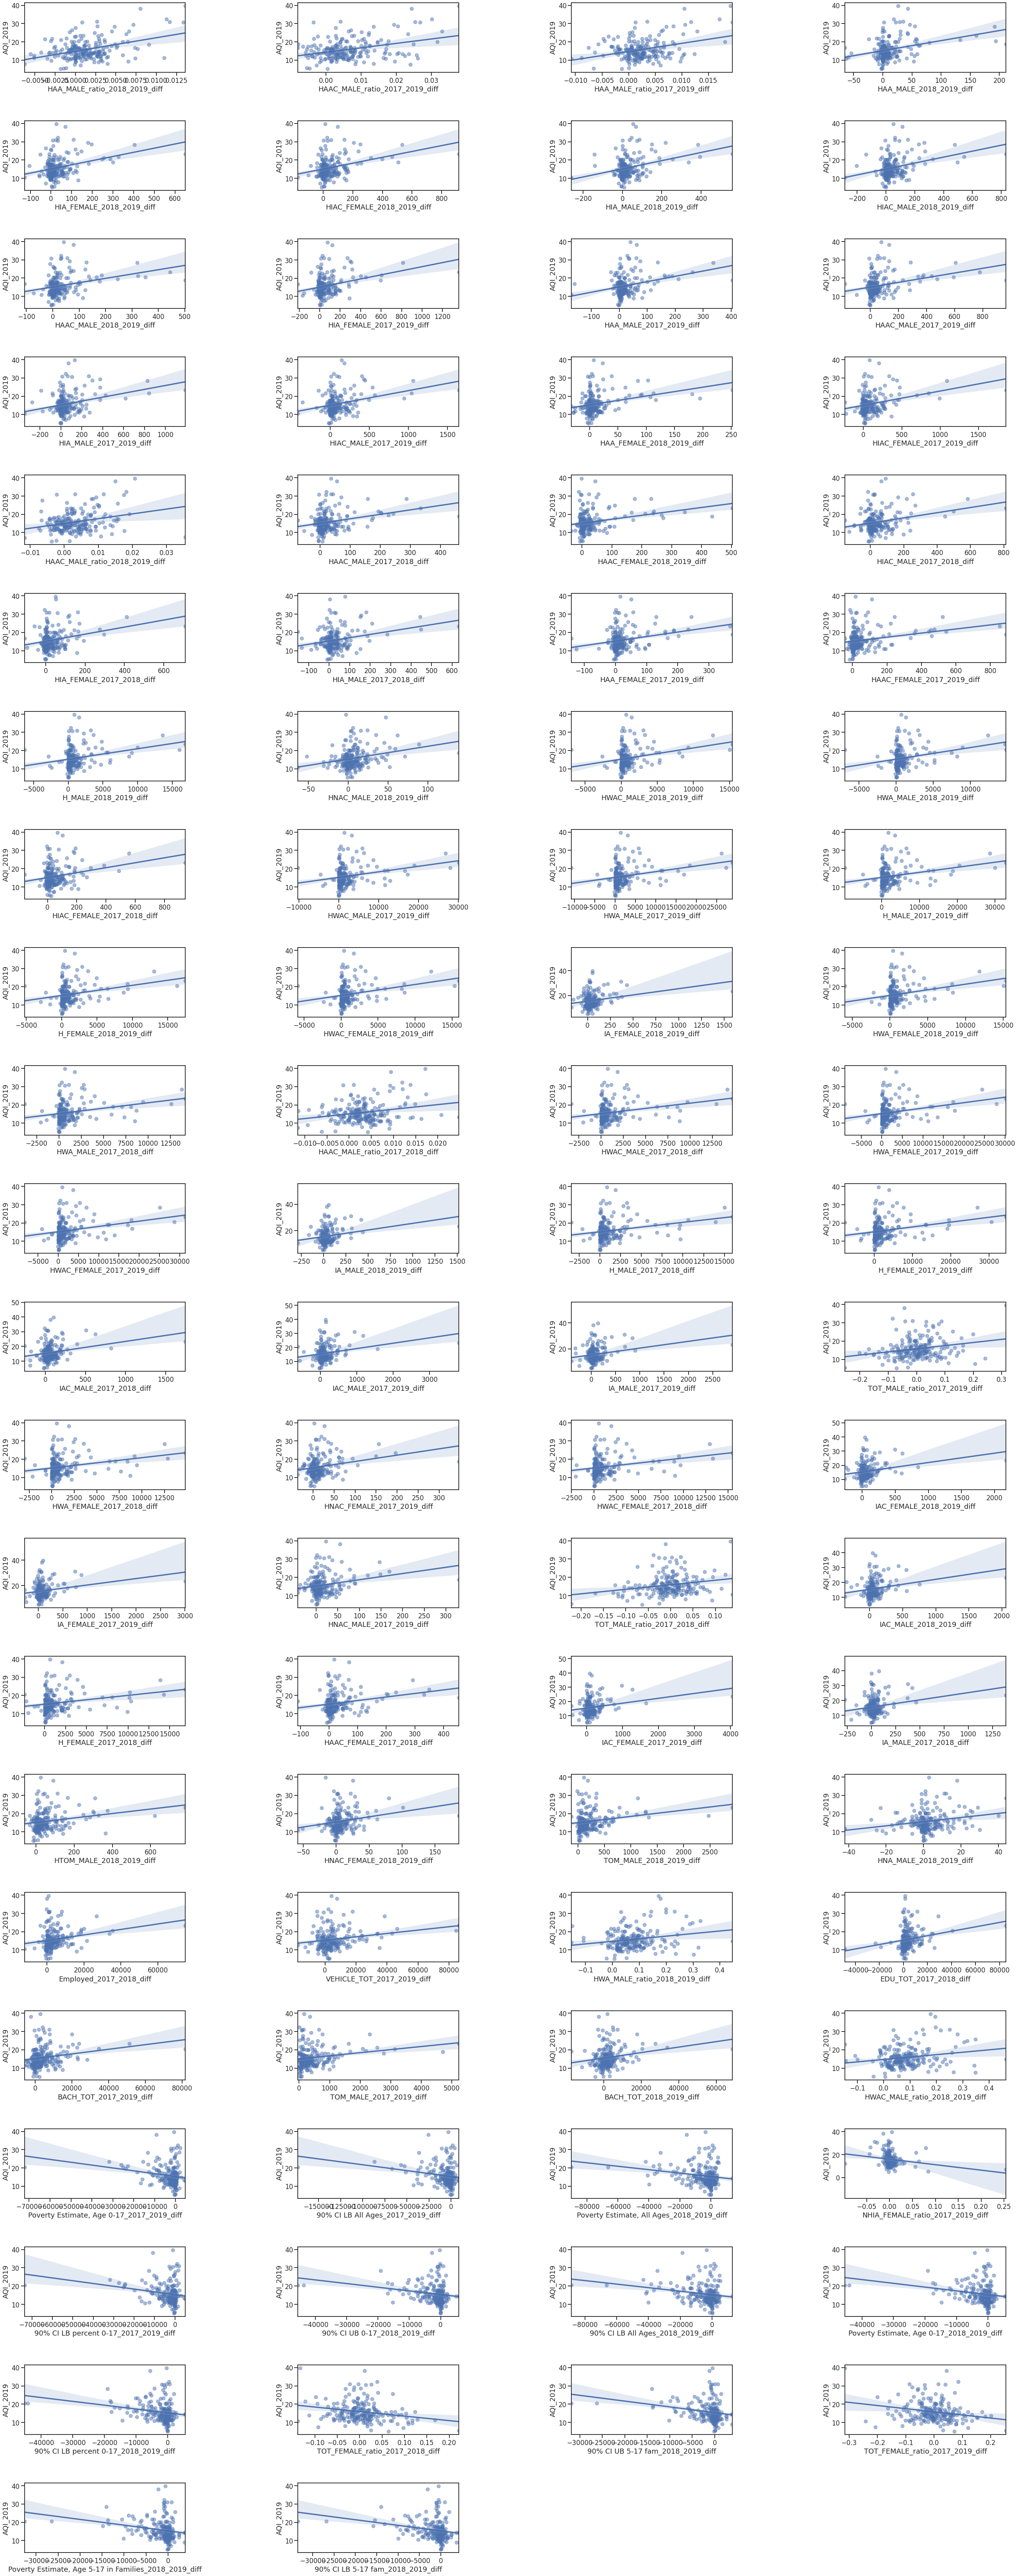

In [19]:
scatterplots(df_diff, 'AQI_2019', r_feat_diff[1:], ncol=4, figsize=(45,120))

In [20]:
display(top_r_features_diff.corr()['AQI_2019'].head(10))
display(top_r_features_diff.corr()['AQI_2019'].tail(10))


AQI_2019                          1.000000
HAA_MALE_ratio_2018_2019_diff     0.405938
HAAC_MALE_ratio_2017_2019_diff    0.360129
HAA_MALE_ratio_2017_2019_diff     0.349482
HAA_MALE_2018_2019_diff           0.326487
HIA_FEMALE_2018_2019_diff         0.317993
HIAC_FEMALE_2018_2019_diff        0.308301
HIA_MALE_2018_2019_diff           0.306801
HIAC_MALE_2018_2019_diff          0.304698
HAAC_MALE_2018_2019_diff          0.301281
Name: AQI_2019, dtype: float64

90% CI LB percent 0-17_2017_2019_diff                   -0.202596
90% CI UB 0-17_2018_2019_diff                           -0.206815
90% CI LB All Ages_2018_2019_diff                       -0.209890
Poverty Estimate, Age 0-17_2018_2019_diff               -0.215930
90% CI LB percent 0-17_2018_2019_diff                   -0.223690
TOT_FEMALE_ratio_2017_2018_diff                         -0.224817
90% CI UB 5-17 fam_2018_2019_diff                       -0.229922
TOT_FEMALE_ratio_2017_2019_diff                         -0.231561
Poverty Estimate, Age 5-17 in Families_2018_2019_diff   -0.233551
90% CI LB 5-17 fam_2018_2019_diff                       -0.235452
Name: AQI_2019, dtype: float64

## Investigate percent changes of pm10 df columns
### percent changes for periods: (17-18), (17-19), (18-19)


In [21]:
# percent change is b-a / a
# also do it with 2 year period

df_17_columns
df_17_18_pct_change = pd.DataFrame()
for col17, col18 in zip(df_17_columns, df_18_columns):
    df_17_18_pct_change[col17 + '_2018_pct_change'] = (df_2018[col18] - df_2017[col17]) / df_2017[col17]
# df_2018[df_18_columns] - df_2017[df_17_columns]
df_17_18_pct_change


Civilian_labor_force_2017_2018_pct_change  Employed_2017_2018_pct_change  \
0                                     0.013844                       0.020189   
1                                     0.028336                       0.033239   
2                                    -0.001903                       0.002235   
3                                     0.006385                       0.011546   
4                                     0.003142                       0.003413   
..                                         ...                            ...   
203                                  -0.009622                      -0.006847   
204                                  -0.014080                      -0.009978   
205                                  -0.002127                       0.000323   
206                                  -0.000829                      -0.001614   
207                                  -0.006981                       0.000987   

     Unemployed_2017_2018_pct_change  Unemployment_rate_2017_2018_pct_change  \
0                          -0.128942                               -0.139535   
1                          -0.093125                               -0.128205   
2                          -0.093261                               -0.093023   
3                          -0.038812                               -0.039216   
4                          -0.001463                                0.000000   
..                               ...                                     ...   
203                        -0.102491                               -0.103448   
204                        -0.111942                               -0.100000   
205                        -0.084676                               -0.103448   
206                         0.019909                                0.027778   
207                        -0.151721                               -0.134615   

     Poverty Estimate, All Ages_2017_2018_pct_change  \
0                                          -0.038496   
1                                          -0.051402   
2                                          -0.059333   
3                                           0.128447   
4                                          -0.049222   
..                                               ...   
203                                         0.040280   
204                                        -0.003911   
205                                         0.044369   
206                                        -0.048956   
207                                        -0.110532   

     90% CI LB All Ages_2017_2018_pct_change  \
0                                  -0.045462   
1                                  -0.053703   
2                                  -0.062900   
3                                   0.155791   
4                                  -0.038434   
..                                       ...   
203                                 0.012364   
204                                -0.005839   
205                                 0.040462   
206                                -0.071456   
207                                -0.140193   

     90% CI UB All Ages_2017_2018_pct_change  \
0                                  -0.032514   
1                                  -0.049561   
2                                  -0.056488   
3                                   0.105858   
4                                  -0.056579   
..                                       ...   
203                                 0.060632   
204                                -0.002167   
205                                 0.047385   
206                                -0.032807   
207                                -0.089644   

     Poverty Percent, All Ages_2017_2018_pct_change  \
0                                         -0.035928   
1                                         -0.070313   
2                                         -0.056338   
3                       

In [22]:
df_17_19_pct_change = pd.DataFrame()
for col17, col19 in zip(df_17_columns, df_19_columns):
    df_17_19_pct_change[col17 + '_2019_pct_change'] = (df_2019[col19] - df_2017[col17]) / df_2017[col17]

df_17_19_pct_change

Civilian_labor_force_2017_2019_pct_change  Employed_2017_2019_pct_change  \
0                                     0.023353                       0.038350   
1                                     0.049031                       0.063602   
2                                    -0.003561                       0.009473   
3                                     0.006188                       0.010616   
4                                     0.025686                       0.023674   
..                                         ...                            ...   
203                                  -0.018294                      -0.019522   
204                                  -0.017330                      -0.017047   
205                                  -0.006297                      -0.006761   
206                                   0.005412                       0.007338   
207                                  -0.004730                       0.008860   

     Unemployed_2017_2019_pct_change  Unemployment_rate_2017_2019_pct_change  \
0                          -0.314094                               -0.325581   
1                          -0.311925                               -0.358974   
2                          -0.291304                               -0.279070   
3                          -0.032583                               -0.029412   
4                           0.059963                                0.036364   
..                               ...                                     ...   
203                         0.022776                                0.034483   
204                        -0.024062                                0.000000   
205                         0.009357                                0.000000   
206                        -0.045506                               -0.027778   
207                        -0.251575                               -0.250000   

     Poverty Estimate, All Ages_2017_2019_pct_change  \
0                                          -0.032148   
1                                          -0.070922   
2                                          -0.260110   
3                                           0.010843   
4                                           0.049586   
..                                               ...   
203                                        -0.069847   
204                                        -0.119758   
205                                        -0.009167   
206                                        -0.010760   
207                                        -0.103812   

     90% CI LB All Ages_2017_2019_pct_change  \
0                                  -0.040862   
1                                  -0.073364   
2                                  -0.303234   
3                                   0.000236   
4                                   0.088033   
..                                       ...   
203                                -0.083672   
204                                -0.129216   
205                                -0.032285   
206                                 0.000901   
207                                -0.136128   

     90% CI UB All Ages_2017_2019_pct_change  \
0                                  -0.024666   
1                                  -0.068969   
2                                  -0.225719   
3                                   0.019605   
4                                   0.023367   
..                                       ...   
203                                -0.059768   
204                                -0.111202   
205                                 0.008679   
206                                -0.019129   
207                                -0.081054   

     Poverty Percent, All Ages_2017_2019_pct_change  \
0                                         -0.029940   
1                                         -0.101563   
2                                         -0.258216   
3                       

In [23]:
df_18_19_pct_change = pd.DataFrame()
for col18, col19 in zip(df_18_columns, df_19_columns):
    df_18_19_pct_change[col18 + '_2019_pct_change'] = (df_2019[col19] - df_2018[col18]) / df_2018[col18]

df_18_19_pct_change

Civilian_labor_force_2018_2019_pct_change  Employed_2018_2019_pct_change  \
0                                     0.009380                       0.017801   
1                                     0.020125                       0.029387   
2                                    -0.001661                       0.007221   
3                                    -0.000195                      -0.000920   
4                                     0.022473                       0.020192   
..                                         ...                            ...   
203                                  -0.008757                      -0.012761   
204                                  -0.003296                      -0.007141   
205                                  -0.004179                      -0.007082   
206                                   0.006246                       0.008966   
207                                   0.002267                       0.007865   

     Unemployed_2018_2019_pct_change  Unemployment_rate_2018_2019_pct_change  \
0                          -0.212560                               -0.216216   
1                          -0.241268                               -0.264706   
2                          -0.218413                               -0.205128   
3                           0.006481                                0.010204   
4                           0.061516                                0.036364   
..                               ...                                     ...   
203                         0.139572                                0.153846   
204                         0.098957                                0.111111   
205                         0.102732                                0.115385   
206                        -0.064138                               -0.054054   
207                        -0.117714                               -0.133333   

     Poverty Estimate, All Ages_2018_2019_pct_change  \
0                                           0.006602   
1                                          -0.020578   
2                                          -0.213441   
3                                          -0.104218   
4                                           0.103924   
..                                               ...   
203                                        -0.105863   
204                                        -0.116302   
205                                        -0.051261   
206                                         0.040163   
207                                         0.007555   

     90% CI LB All Ages_2018_2019_pct_change  \
0                                   0.004820   
1                                  -0.020776   
2                                  -0.256466   
3                                  -0.134588   
4                                   0.131523   
..                                       ...   
203                                -0.094864   
204                                -0.124102   
205                                -0.069918   
206                                 0.077926   
207                                 0.004729   

     90% CI UB All Ages_2018_2019_pct_change  \
0                                   0.008112   
1                                  -0.020420   
2                                  -0.179363   
3                                  -0.077997   
4                                   0.084740   
..                                       ...   
203                                -0.113517   
204                                -0.109272   
205                                -0.036955   
206                                 0.014141   
207                                 0.009435   

     Poverty Percent, All Ages_2018_2019_pct_change  \
0                                          0.006211   
1                                         -0.033613   
2                                         -0.213930   
3                       

In [24]:
df_pct_change = pd.concat([df_17_18_pct_change, df_17_19_pct_change, df_18_19_pct_change], axis=1)
# df_diff = pd.merge(df_18_17_diff, df_19_18_diff)
df_pct_change.insert(loc=0, column='AQI_2019', value=df_2019['AQI_2019'])
df_pct_change

AQI_2019  Civilian_labor_force_2017_2018_pct_change  \
0    20.073389                                   0.013844   
1    12.958515                                   0.028336   
2    13.125000                                  -0.001903   
3    11.247911                                   0.006385   
4    17.413408                                   0.003142   
..         ...                                        ...   
203  10.503937                                  -0.009622   
204  14.431990                                  -0.014080   
205  15.656425                                  -0.002127   
206  13.354142                                  -0.000829   
207   9.385135                                  -0.006981   

     Employed_2017_2018_pct_change  Unemployed_2017_2018_pct_change  \
0                         0.020189                        -0.128942   
1                         0.033239                        -0.093125   
2                         0.002235                        -0.093261   
3                         0.011546                        -0.038812   
4                         0.003413                        -0.001463   
..                             ...                              ...   
203                      -0.006847                        -0.102491   
204                      -0.009978                        -0.111942   
205                       0.000323                        -0.084676   
206                      -0.001614                         0.019909   
207                       0.000987                        -0.151721   

     Unemployment_rate_2017_2018_pct_change  \
0                                 -0.139535   
1                                 -0.128205   
2                                 -0.093023   
3                                 -0.039216   
4                                  0.000000   
..                                      ...   
203                               -0.103448   
204                               -0.100000   
205                               -0.103448   
206                                0.027778   
207                               -0.134615   

     Poverty Estimate, All Ages_2017_2018_pct_change  \
0                                          -0.038496   
1                                          -0.051402   
2                                          -0.059333   
3                                           0.128447   
4                                          -0.049222   
..                                               ...   
203                                         0.040280   
204                                        -0.003911   
205                                         0.044369   
206                                        -0.048956   
207                                        -0.110532   

     90% CI LB All Ages_2017_2018_pct_change  \
0                                  -0.045462   
1                                  -0.053703   
2                                  -0.062900   
3                                   0.155791   
4                                  -0.038434   
..                                       ...   
203                                 0.012364   
204                                -0.005839   
205                                 0.040462   
206                                -0.071456   
207                                -0.140193   

     90% CI UB All Ages_2017_2018_pct_change  \
0                                  -0.032514   
1                                  -0.049561   
2                                  -0.056488   
3                                   0.105858   
4                                  -0.056579   
..                                       ...   
203                                 0.060632   
204                                -0.002167   
205                                 0.047385   
206                                -0.032807   
207                                -0.089644   

     Poverty Percent, All Ag

In [26]:
# using corr() to find r values of dataset on AQI feature
# make a list a that contains r values features greater than 0.2 and less than -0.2
# Use that list to retain a dataframe with those attributes to explore; rather than exploring all unnecessary columns

corr_pct_change = list(zip(df_pct_change.corr()['AQI_2019'].sort_values(ascending=False).index.tolist(), df_pct_change.corr()['AQI_2019'].sort_values(ascending=False).values.tolist()))
r_feat_pct_change = [feature[0] for feature in corr_pct_change if feature[1] >= 0.2 or feature[1] <= -0.2]
top_r_features_pct_change = df_pct_change[r_feat_pct_change]
display(top_r_features_pct_change)


AQI_2019  Personal income (thousands of dollars) 2018_2019_pct_change  \
0    20.073389                                           0.030317             
1    12.958515                                           0.055158             
2    13.125000                                           0.034268             
3    11.247911                                           0.029182             
4    17.413408                                           0.042433             
..         ...                                                ...             
203  10.503937                                           0.037141             
204  14.431990                                           0.023454             
205  15.656425                                           0.027782             
206  13.354142                                           0.034302             
207   9.385135                                           0.020824             

     Per capita personal income (dollars) 2018_2019_pct_change  \
0                                             0.031654           
1                                             0.038434           
2                                             0.034342           
3                                             0.026966           
4                                             0.046478           
..                                                 ...           
203                                           0.037051           
204                                           0.024796           
205                                           0.023512           
206                                           0.027690           
207                                           0.012100           

     BACH_TOT_2017_2019_pct_change  \
0                        -0.005177   
1                         0.104207   
2                         0.040944   
3                        -0.230957   
4                         0.096472   
..                             ...   
203                       0.171526   
204                       0.073753   
205                       0.007331   
206                       0.112467   
207                      -0.096423   

     Median Household Income_2017_2019_pct_change  \
0                                        0.066941   
1                                        0.093371   
2                                        0.150067   
3                                        0.070584   
4                                       -0.006453   
..                                            ...   
203                                      0.066849   
204                                      0.119469   
205                                      0.102182   
206                                      0.129018   
207                                      0.082802   

     90% CI UB medh inc_2017_2019_pct_change  \
0                                   0.085679   
1                                   0.107546   
2                                   0.125771   
3                                   0.097186   
4                                  -0.020749   
..                                       ...   
203                                 0.041718   
204                                 0.120713   
205                                 0.113662   
206                                 0.112862   
207                                 0.108546   

     BACH_TOT_ratio_2017_2019_pct_change  \
0                              -0.004235   
1                               0.069080   
2                               0.041679   
3                              -0.233963   
4                               0.086319   
..                                   ...   
203                             0.170819   
204                             0.080973   
205                            -0.001584   
206                             0.099352   
207                            -0.099942   

     90% CI Lower Bound LB medh inc_2017_2019_pct_change  \
0   

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(top_r_features_pct_change.corr()['AQI_2019'])

AQI_2019                                                       1.000000
Personal income (thousands of dollars) 2018_2019_pct_change    0.393820
Per capita personal income (dollars) 2018_2019_pct_change      0.333996
BACH_TOT_2017_2019_pct_change                                  0.255427
Median Household Income_2017_2019_pct_change                   0.238973
90% CI UB medh inc_2017_2019_pct_change                        0.238683
BACH_TOT_ratio_2017_2019_pct_change                            0.231226
90% CI Lower Bound LB medh inc_2017_2019_pct_change            0.228986
Employed_2017_2019_pct_change                                  0.227586
TOT_MALE_ratio_2017_2019_pct_change                            0.224411
WA_MALE_2017_2018_pct_change                                   0.222101
TOT_MALE_ratio_2017_2018_pct_change                            0.219817
Civilian_labor_force_2018_2019_pct_change                      0.213958
WAC_MALE_2017_2018_pct_change                                  0

In [28]:
display(top_r_features_pct_change.corr()['AQI_2019'].head(10))
display(top_r_features_pct_change.corr()['AQI_2019'].tail(10))

AQI_2019                                                       1.000000
Personal income (thousands of dollars) 2018_2019_pct_change    0.393820
Per capita personal income (dollars) 2018_2019_pct_change      0.333996
BACH_TOT_2017_2019_pct_change                                  0.255427
Median Household Income_2017_2019_pct_change                   0.238973
90% CI UB medh inc_2017_2019_pct_change                        0.238683
BACH_TOT_ratio_2017_2019_pct_change                            0.231226
90% CI Lower Bound LB medh inc_2017_2019_pct_change            0.228986
Employed_2017_2019_pct_change                                  0.227586
TOT_MALE_ratio_2017_2019_pct_change                            0.224411
Name: AQI_2019, dtype: float64

HWAC_FEMALE_ratio_2017_2019_pct_change   -0.297682
HWA_FEMALE_ratio_2017_2018_pct_change    -0.302902
H_FEMALE_ratio_2017_2019_pct_change      -0.305847
NH_MALE_ratio_2017_2019_pct_change       -0.310174
HWAC_FEMALE_ratio_2017_2018_pct_change   -0.313699
H_FEMALE_ratio_2017_2018_pct_change      -0.326595
NH_MALE_ratio_2018_2019_pct_change       -0.344387
NH_FEMALE_ratio_2018_2019_pct_change     -0.353626
NH_FEMALE_ratio_2017_2018_pct_change     -0.362980
NH_FEMALE_ratio_2017_2019_pct_change     -0.367160
Name: AQI_2019, dtype: float64

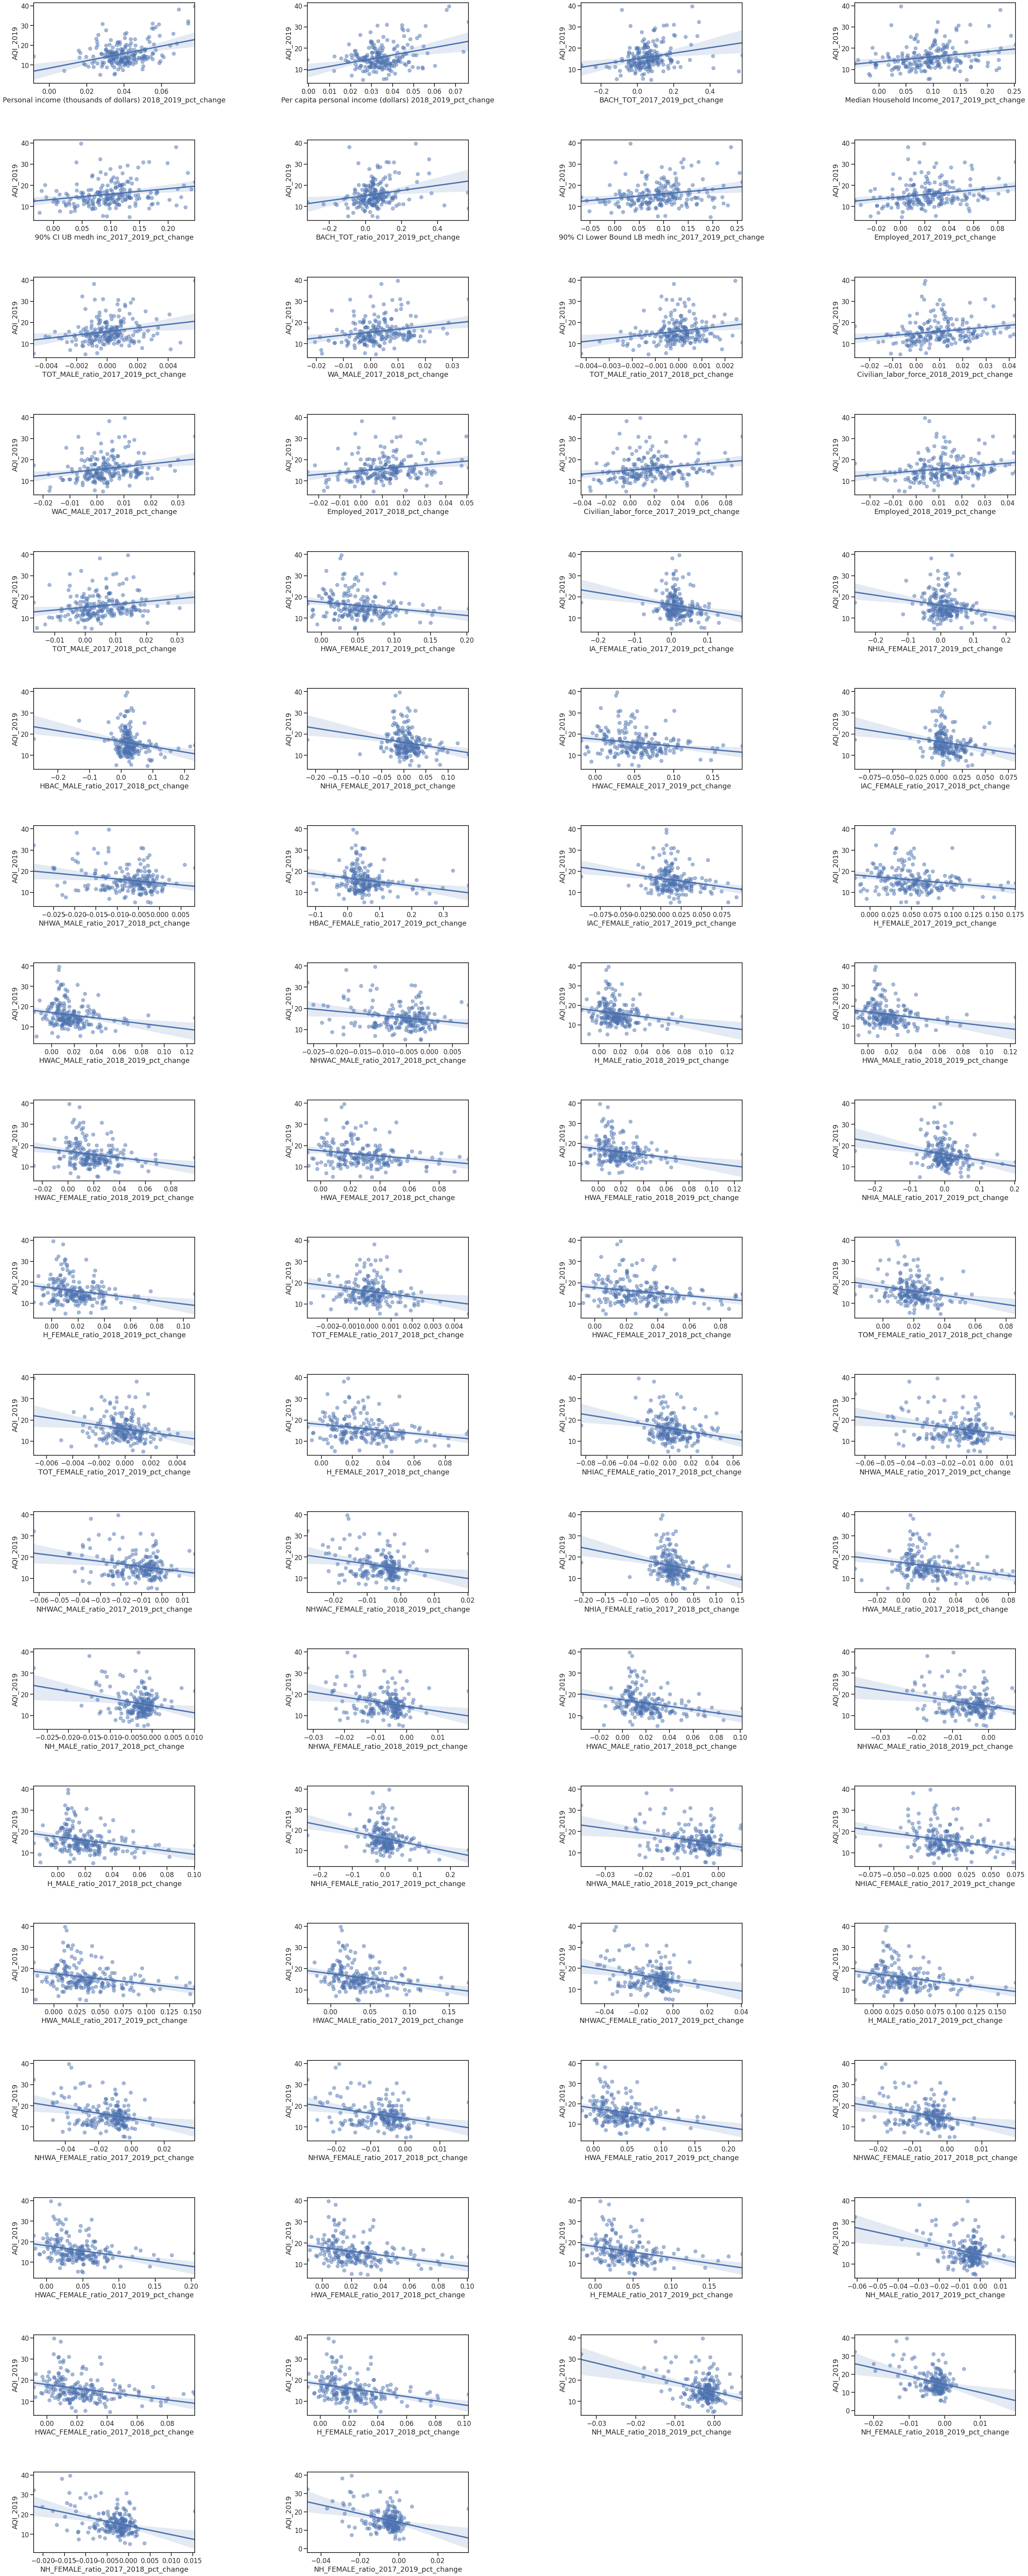

In [30]:
scatterplots(df_pct_change, 'AQI_2019', r_feat_pct_change[1:], ncol=4, figsize=(45,120))

In [31]:
# save datasets
pm10_2017_2019 = r'../../data/processed/pm10_2017_2019'
df.to_csv(pm10_2017_2019, index=False)

pm10_year_diffs = r'../../data/processed/pm10_year_diffs'
df_diff.to_csv(pm10_year_diffs, index=False)

pm10_year_pct_change = r'../../data/processed/pm10_year_pct_change'
df_pct_change.to_csv(pm10_year_pct_change, index=False)

pm10_year_diff_top_corr =  r'../../data/processed/pm10_year_diff_top_corr'
top_r_features_diff.to_csv(pm10_year_diff_top_corr, index=False)

pm10_year_pct_change_top_corr = r'../../data/processed/pm10_year_pct_change_top_corr'
top_r_features_pct_change.to_csv(pm10_year_pct_change_top_corr, index=False)